# 1. Organizing Images

In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from random import choice 

import os
os.chdir('C:/Users/LOTLOUISCHO/Desktop/02MyProjects/ktx_project')
import glob
from skimage.io import imread

import warnings
warnings.filterwarnings("ignore")

In [2]:
#0 means KTX-1
#1 means KTX-EUM
#2 means KTX-Sancheon
#3 means SRT
hsr0 = []
hsr1 = []
hsr2 = []
hsr3 = []

In [3]:
for classes in os.listdir('trains'):
    route = 'trains/'+classes+'/'
    for path in os.listdir(route):
        if classes == 'ktx_1':
            hsr0.append(route+path)
        elif classes == 'ktx_eum':
            hsr1.append(route+path)
        elif classes == 'ktx_sancheon':
            hsr2.append(route+path)
        elif classes == 'srt':
            hsr3.append(route+path)

In [4]:
print('KTX-1:',len(hsr0))
print('KTX-EUM:',len(hsr2))
print('KTX-Sancheon:',len(hsr1))
print('SRT:',len(hsr3))

KTX-1: 10
KTX-EUM: 10
KTX-Sancheon: 10
SRT: 10


# 2. Exploratory Data Analysis

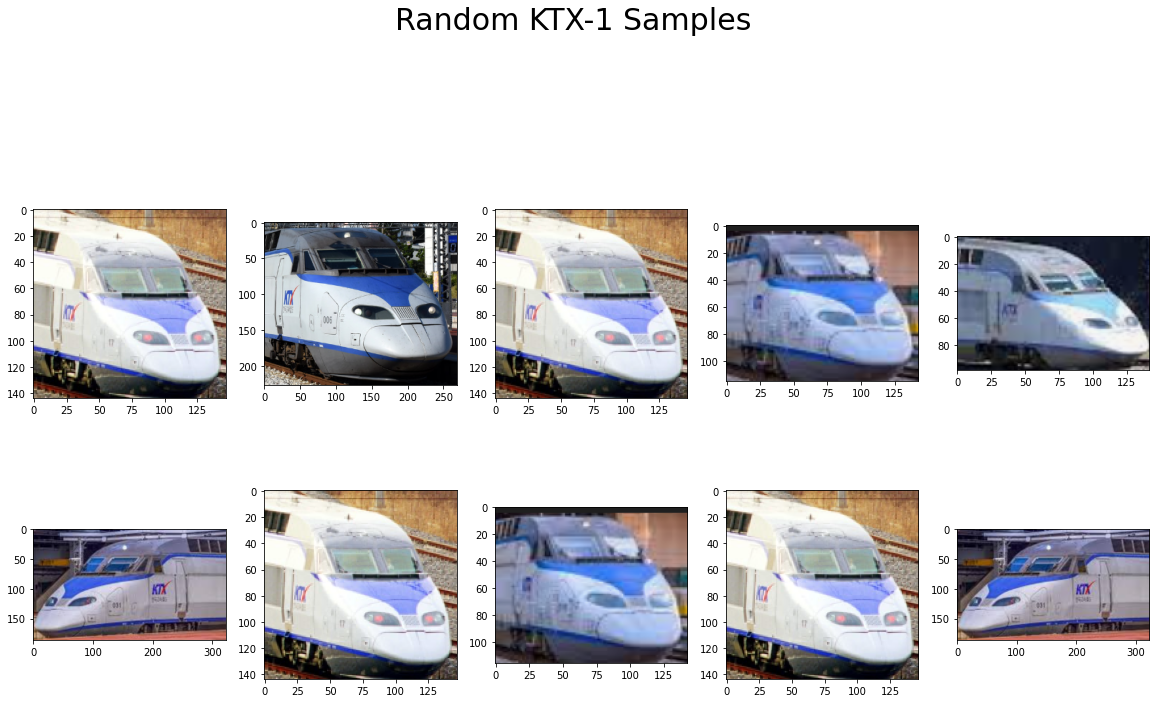

In [5]:
from random import choice 
fig,axes = plt.subplots(figsize=(20,25))

random_image = [choice(hsr0)for x in range(0,11)] 

for i in range(0,len(random_image)):
    img = imread(random_image[i])
    plt.imshow(img)
    axes =plt.subplot(5,5,i+1)

fig.delaxes(axes)
fig.suptitle('Random KTX-1 Samples',fontsize=30)
plt.show() 

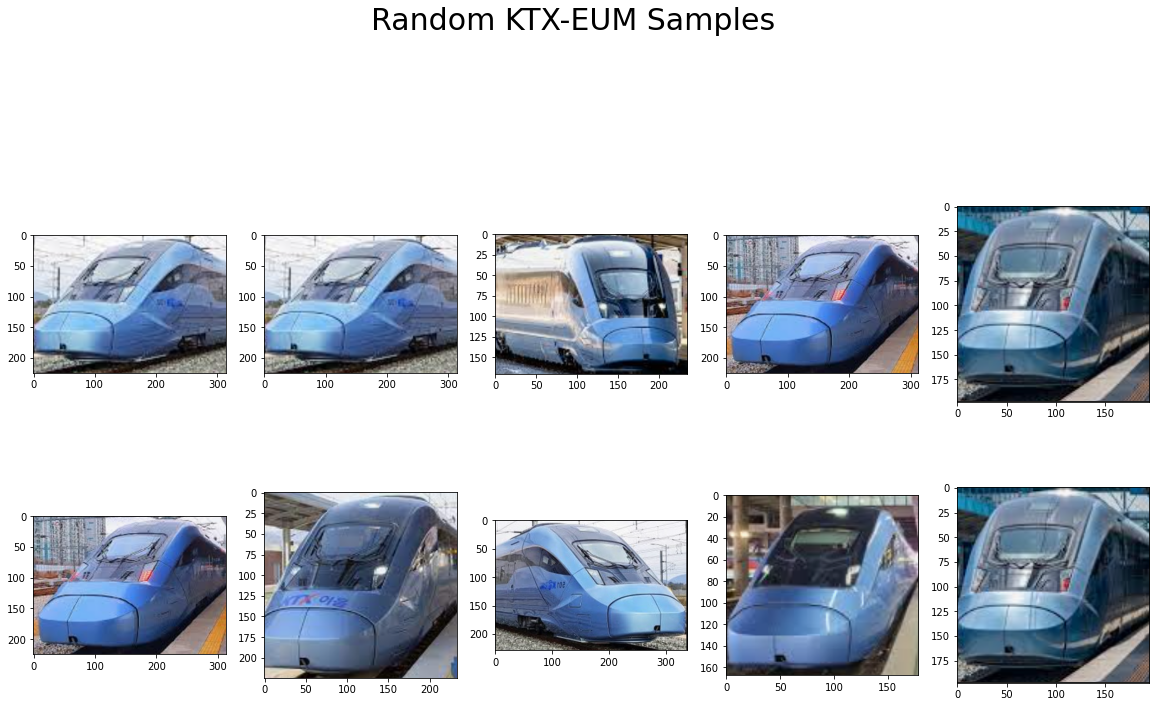

In [6]:
fig,axes = plt.subplots(figsize=(20,25))
  
random_image = [choice(hsr1)for x in range(0,11)] 

for i in range(0,len(random_image)):
    img = imread(random_image[i])
    plt.imshow(img)
    axes =plt.subplot(5,5,i+1)

fig.delaxes(axes)
fig.suptitle('Random KTX-EUM Samples',fontsize=30)
plt.show() 

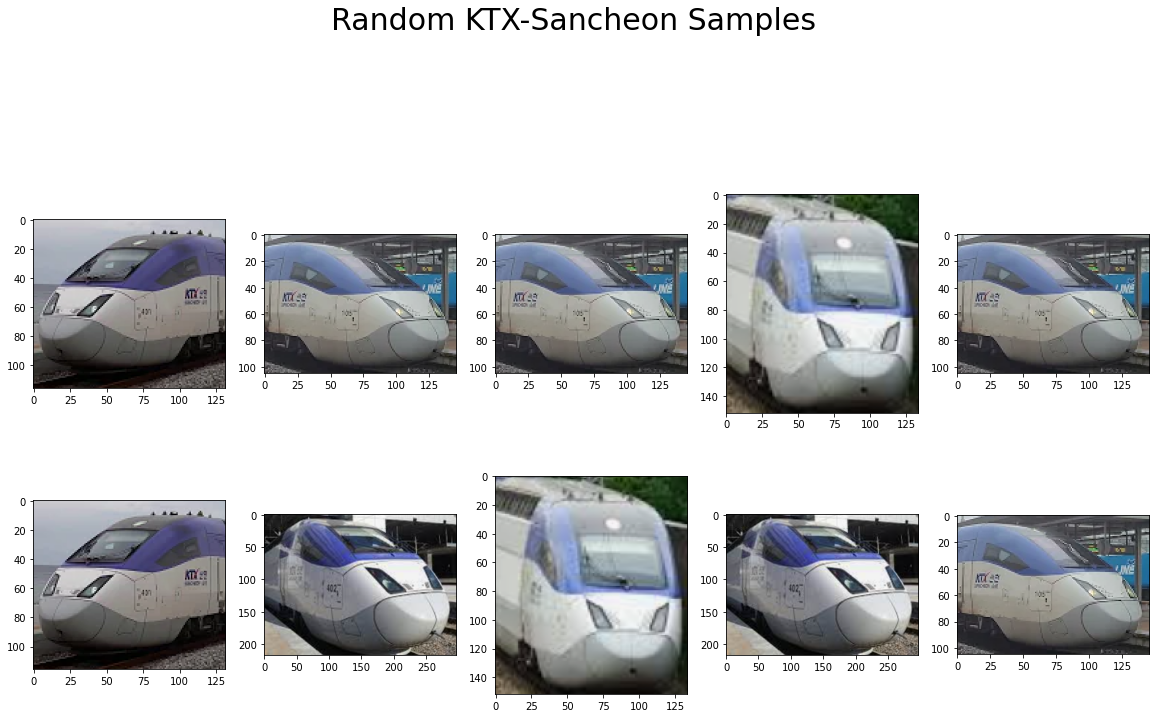

In [7]:
fig,axes = plt.subplots(figsize=(20,25))
  
random_image = [choice(hsr2)for x in range(0,11)]

for i in range(0,len(random_image)):
    img = imread(random_image[i])
    plt.imshow(img)
    axes =plt.subplot(5,5,i+1)

fig.delaxes(axes)
fig.suptitle('Random KTX-Sancheon Samples',fontsize=30)
plt.show() 

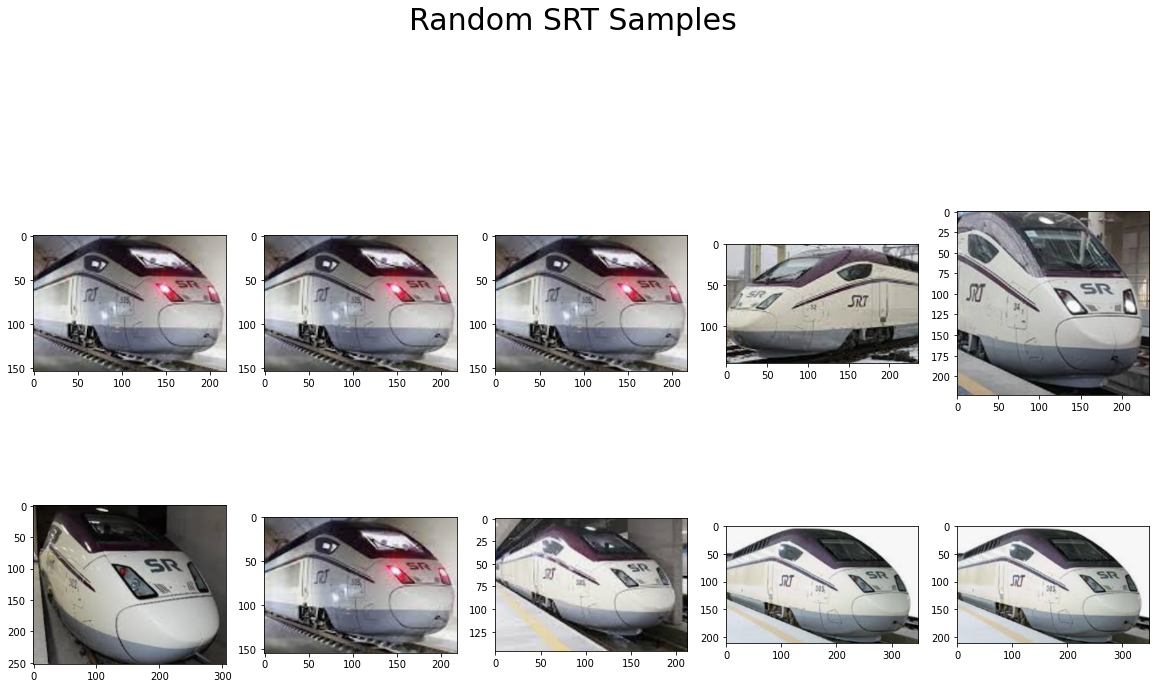

In [8]:
fig,axes = plt.subplots(figsize=(20,25))
  
random_image = [choice(hsr3)for x in range(0,11)] #setting the length of array at 10 to print 10 images

for i in range(0,len(random_image)):
    img = imread(random_image[i])
    plt.imshow(img)
    axes =plt.subplot(5,5,i+1)

fig.delaxes(axes)
fig.suptitle('Random SRT Samples',fontsize=30)
plt.show() 

# 3. Create Training and Testing Image Datasets

In [9]:
batch_size = 32 #batch size is a number of samples processed before the model is updated
img_height = 180 #height of our image
img_width = 180 #width of our image
epochs = 20 #number of steps

In [10]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    'trains',
    validation_split=0.2, #training and testing images are split around 80-20%
    subset="training", #we are going to 'train' these datasets
    seed=123, #random seed number
    image_size=(img_height, img_width), #adjust the image size
    batch_size=batch_size) #given batch size

Found 40 files belonging to 4 classes.
Using 32 files for training.


In [11]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  'trains',
    validation_split=0.2,
    subset="validation", #we are going to 'test' these datasets
    seed=123, #random seed number
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 40 files belonging to 4 classes.
Using 8 files for validation.


In [12]:
AUTOTUNE = tf.data.AUTOTUNE
training_data = training_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

# 4. CNN Model Creation

In [14]:
num_classes = 4
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes, activation='softmax'),
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [16]:
model_history = model.fit(
  training_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 1.3886 - accuracy: 0.2500 - val_loss: 1.6542 - val_accuracy: 0.1250
Epoch 2/20
1/1 [==============================] - 0s 453ms/step - loss: 1.4556 - accuracy: 0.2812 - val_loss: 1.3130 - val_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 442ms/step - loss: 1.3638 - accuracy: 0.4688 - val_loss: 1.3262 - val_accuracy: 0.6250
Epoch 4/20
1/1 [==============================] - 0s 442ms/step - loss: 1.3491 - accuracy: 0.4062 - val_loss: 1.3409 - val_accuracy: 0.2500
Epoch 5/20
1/1 [==============================] - 0s 426ms/step - loss: 1.3214 - accuracy: 0.6875 - val_loss: 1.3130 - val_accuracy: 0.1250
Epoch 6/20
1/1 [==============================] - 0s 449ms/step - loss: 1.2740 - accuracy: 0.4375 - val_loss: 1.2287 - val_accuracy: 0.3750
Epoch 7/20
1/1 [==============================] - 1s 521ms/step - loss: 1.1855 - accuracy: 0.7188 - val_loss: 1.0969 - val_accuracy: 0.8750
Epoch 8/20
1/1 [=======

In [17]:
training_acc = model_history.history['accuracy'] #training accuracy
testing_acc = model_history.history['val_accuracy'] #test accuracy

training_loss = model_history.history['loss'] #training loss
testing_loss = model_history.history['val_loss'] #test loss

<Figure size 432x288 with 0 Axes>

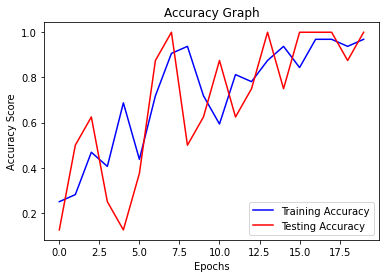

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(range(epochs),training_acc,'b',label='Training Accuracy')
plt.plot(range(epochs), testing_acc, 'r', label='Testing Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

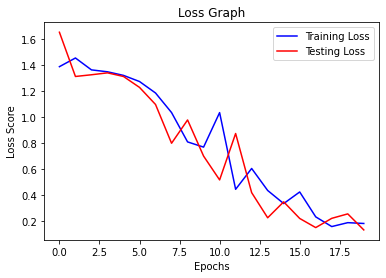

<Figure size 432x288 with 0 Axes>

In [19]:
plt.plot(range(epochs),training_loss,'b',label='Training Loss')
plt.plot(range(epochs), testing_loss, 'r', label='Testing Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss Score')
plt.legend()
plt.figure()

# Predicting with Given Images

In [20]:
class_names = ['KTX-1','KTX-EUM','KTX-Sancheon','SRT']

In [21]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 23ms/step


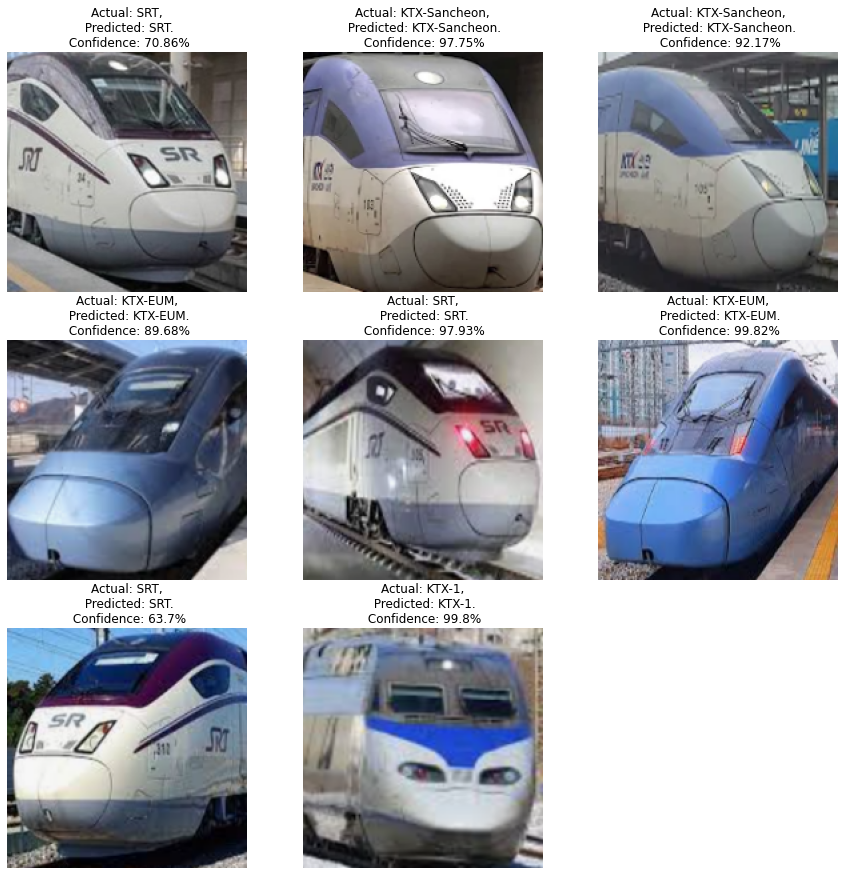

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in val_data.take(1):
    for i in range(8):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")